In [1]:
cd ..

C:\Users\pi96doc\Documents\Programming\PythonScripts\StateModeling


In [15]:
# %matplotlib notebook
# %matplotlib inline
#import mpld3
#mpld3.enable_notebook()

import StateModeling as stm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from Corona.LoadData import loadData, preprocessData
from Corona.CoronaModel import CoronaDelayModel, plotTotalCases
from bokeh.io import push_notebook, show, output_notebook
import os

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# import cufflinks as cf

output_notebook()

if True: # import the RKI German data
    if False:
        ExampleRegions = ['SK Gera', 'LK Nordhausen', 'SK Erfurt', 'SK Suhl', 'LK Weimarer Land', 'SK Weimar','LK Greiz', 
                      'LK Schmalkalden-Meiningen', 'LK Eichsfeld', 'LK Sömmerda', 'LK Hildburghausen', 
                      'LK Saale-Orla-Kreis','LK Kyffhäuserkreis', 'LK Saalfeld-Rudolstadt', 'LK Ilm-Kreis',
                      'LK Unstrut-Hainich-Kreis', 'LK Gotha', 'LK Sonneberg', 'SK Eisenach', 'LK Altenburger Land', 
                      'LK Wartburgkreis']
    else:
        ExampleRegions = None
    # ExampleRegions = ['SK Jena', 'LK Greiz', 'LK Sonneberg', 'LK Göttingen'] # ['SK Jena','SK Gera'] # 
    ExampleRegions = ['SK Jena','SK Gera','LK Gütersloh'] # 
    AllMeasured = loadData(useThuringia = False, pullData=False)
    print(AllMeasured['Cases'].shape)
    # AllMeasured = preprocessData(AllMeasured, ReduceDistricts=["SK Jena", "LK Sonneberg"], SumDistricts=False, SumAges=True, SumGender=True)
    AllMeasured = preprocessData(AllMeasured, ReduceDistricts=ExampleRegions, SumDistricts=False, SumAges=False, SumGender=True)
    deathPath = r"C:\Users\pi96doc\Documents\Programming\PythonScripts\FromWeb\COVID-19-DE\time_series\time-series_19-covid-Deaths.csv"
    # deaths = 
else: # import the Thuringian Data (only if the line lists are present on your system)
    ExampleRegions = ['SK Jena', 'LK Greiz', 'LK Sonneberg'] # ['SK Jena','SK Gera'] # 
    # ExampleRegions = ['SK Jena'] # ['SK Jena','SK Gera'] # 
    AllMeasured = loadData(r"COVID-19 Linelist 2020_06_08.xlsx", useThuringia = True, pullData=False) # lastDate='09.05.2020'
    print(AllMeasured['Cases'].shape)
    if True:
        AllMeasured = preprocessData(AllMeasured, ReduceDistricts=None, SumDistricts=True, SumAges=True, SumGender=True)
    else:
        AllMeasured = preprocessData(AllMeasured, ReduceDistricts=ExampleRegions, SumDistricts=False, SumAges=True, SumGender=True)
AllMeasured['Cases'] = np.squeeze(AllMeasured['Cases'])
AllMeasured['Dead'] = np.squeeze(AllMeasured['Dead'])
if (AllMeasured['Cases'].ndim == 1):
    AllMeasured['Cases']=AllMeasured['Cases'][:,np.newaxis,np.newaxis,np.newaxis]
    AllMeasured['Dead']=AllMeasured['Dead'][:,np.newaxis,np.newaxis,np.newaxis]
else:
    AllMeasured['Cases']=AllMeasured['Cases'][:,np.newaxis,np.newaxis,:]
    AllMeasured['Dead']=AllMeasured['Dead'][:,np.newaxis,np.newaxis,:]

if 'Hospitalized'  in AllMeasured.keys():
    AllMeasured['Hospitalized'] = np.squeeze(AllMeasured['Hospitalized'])
    if (AllMeasured['Hospitalized'].ndim == 1):
        AllMeasured['Hospitalized']=AllMeasured['Hospitalized'][:,np.newaxis,np.newaxis,np.newaxis]
    else:
        AllMeasured['Hospitalized']=AllMeasured['Hospitalized'][:,np.newaxis,np.newaxis,:]
    
AllMeasured['Population'] = np.squeeze(AllMeasured['Population'])
print(AllMeasured['Cases'].shape)

lossWeights = {'cases':0.1,'hospitalization':0.1,'deaths': 0.1}

M = CoronaDelayModel(AllMeasured, Tmax = AllMeasured['Cases'].shape[0], lossWeight=lossWeights)


Loading BokehJS ...

(175, 412, 7, 3)
(175, 1, 1, 3, 7)


ValueError: Number of initialization values 3 of variable District does not match its shape [1 1 1 7]

In [14]:
M.DataDict={}
g = M.getGUI(showResults=M.showSimRes, doFit=M.doFit, Dates = list(AllMeasured['Dates']))


Loss is: 1.8352946


Loss is: 0.3022074
Loss is: 0.2156044
Loss is: 0.23170261


In [13]:
q=M.assignNewVar('lambdaTVR', 0.0001)
M.Var['lambdaTVR']()

<tf.Tensor: shape=(), dtype=float32, numpy=1e-04>

In [10]:
a=AllMeasured['Cases']
print(a.shape)
b=a[np.newaxis,:,np.newaxis,:,:,:]
b.shape


(175, 1, 1, 1)


(1, 175, 1, 1, 1, 1)

In [4]:
# stm.Loss_FixedGaussian(np.squeeze(M.ResultVals()['deaths']), M.FitDict['deaths'])

In [6]:
AllMeasured = loadData(useThuringia = False, pullData=False)


In [9]:
AllMeasured['Cases'][:,:,-1,:].shape

(128, 412, 3)

Sum of states deviates by: 8.940697e-08, from the starting state:[0.36681065 0.32319126 0.3099981 ]. relative: [2.4374148e-07 2.7663796e-07 2.8841134e-07]


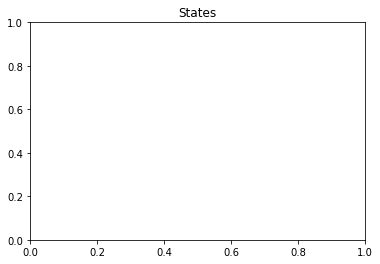

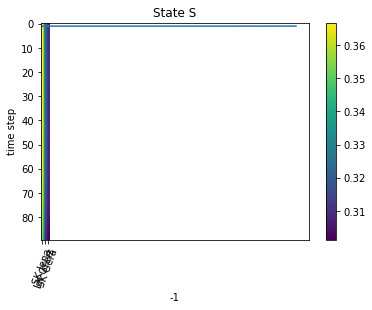

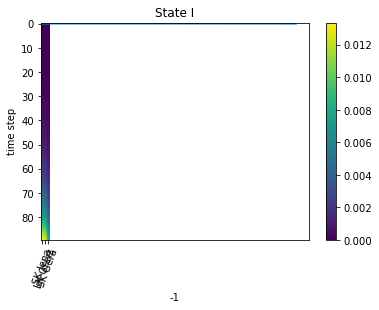

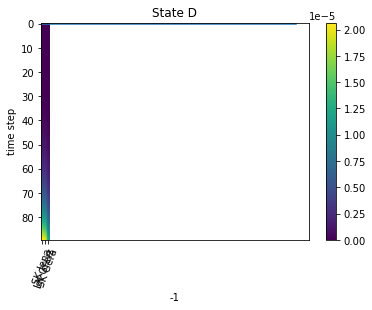

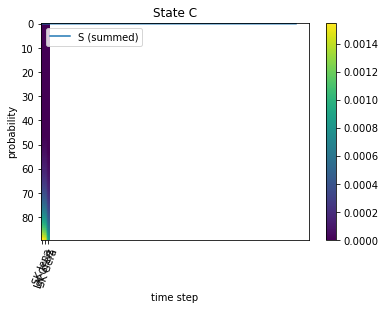

In [7]:
M.showStates()

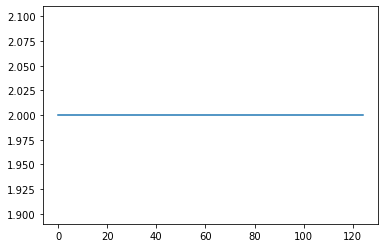

In [5]:
plt.plot(np.squeeze(M.Var['R']()))

In [17]:
M.Var['R']().shape

TensorShape([125, 1, 1, 1])

In [28]:
#interact_manual(showSim,
#        ymin=ymin,
#        ymax=ymax)

d = widgets.FloatLogSlider(0.06,min=-10,max=2.0,continuous_update=False)
r = widgets.FloatLogSlider(0.01,min=-10,max=2.0,continuous_update=False)
uiS = widgets.HBox((d,r))
allSimWidgets = {'d':d}
print('Simulation Control:')
    
d.observe(assignParam, names='value')
# d.observe(showSimRes, names='value')
# outS = widgets.interactive_output(assignParam, allSimWidgets)
display(uiS, outS)

ymin = widgets.FloatLogSlider(0.001,min=-10,max=3,continuous_update=False)
ymax = widgets.FloatLogSlider(30.0,min=-10,max=3,continuous_update=False)
ui = widgets.HBox((ymin,ymax))
allWidgets = {'ymin': ymin, 'ymax': ymax}
out = widgets.interactive_output(showSimRes, allWidgets)

# out.layout.width = '700px';out.layout.height = '350px'
display(ui, out)

ymin = widgets.FloatLogSlider(0.0001,min=-10,max=6.0,continuous_update=False)
ymax = widgets.FloatLogSlider(0.01,min=-10,max=2.0,continuous_update=False)
ui = widgets.HBox((ymin,ymax))
allWidgets = {'ymin': ymin, 'ymax': ymax}
out2 = widgets.interactive_output(showSimStates, allWidgets)
#out2.layout.width = '700px';out2.layout.height = '350px'
#display(ui, out2)


Simulation Control:


Output(outputs=({'output_type': 'stream', 'text': 'd: 0.039810717055349734\nLoss is: tf.Tensor(0.000104670384,…

Output()

AttributeError: dtype

In [5]:
import os
os.getcwd()

'C:\\Users\\pi96doc\\Documents\\Programming\\PythonScripts\\StateModeling'

In [8]:
from ipywidgets import widgets, Layout
from IPython.display import display
item_layout = Layout(
    display='flex',flex_flow='row',
    justify_content='space-between'
)
box_layout=Layout(
    display='flex',flex_flow='column',
    border='solid 2px',align_items='stretch',width='50%')
tickLayout = Layout(display='flex', width='30%')
inFitWidget = widgets.Checkbox(value=True, indent=False, layout=tickLayout, description='Country')
drop = widgets.Dropdown(options=['a','b'], indent=False, value='a')
dropWidget = widgets.HBox((inFitWidget, drop), display='flex', layout = item_layout)
valueWidget = widgets.FloatLogSlider(value=1.0,base=10,min=-7,max=1)
boxWidget = widgets.HBox((Label('Hi'),valueWidget),layout=item_layout)
# valueWidget = widgets.HBox((inFitWidget,valueWidget))
widget = widgets.Box((dropWidget, boxWidget), layout=box_layout)
display(widgets.HBox((widget,widget,widget, widget)))

In [15]:
valueWidget.description

''

In [10]:
def showSimRes(ymin=0.0001,ymax=1.0):
    doFit()
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='cases',
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='hospitalization',
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    p=M.showResultsBokeh(title=AllMeasured['Region'], Scale=PopSum, ylabel='fraction', 
                  xlim=xlim, dims=("District"), subPlot='deaths', 
                  legendPlacement='upper right',figsize=[10,5], Dates=AllMeasured['Dates'])
    return p


In [5]:
g['T0'].children[1].value

0

In [18]:
M.Var['T0']()

<tf.Tensor: shape=(1, 2, 1, 1), dtype=float32, numpy=
array([[[[2.5118864e-06]],

        [[7.1999998e+00]]]], dtype=float32)>

In [4]:
from ipywidgets import interact
import numpy as np
import pandas as pd

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
Dates = M.getDates(AllMeasured['Dates'],y)
Dates = pd.to_datetime(Dates, dayfirst=True)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef', name='Blubb') # , x_axis_type='datetime'
# r = p.line(pd.to_datetime(Dates), y, color="#8888cc", line_width=1.5, alpha=0.8)
# r = p.vbar_stack([x], y=[y-0.5], color="#8888cc")
r = p.vbar('x', top='y',color="#cc8800", alpha=0.4, source=source, name='Hi there')
# r = p.vbar(x, top=y+1, width=0.15, color="#8888cc", alpha=0.6)
p.xaxis.axis_label = 'Hi'
q=show(p, notebook_handle=True)
# pd.date_range(start=Dates[0], periods=toPlot.shape[0]).map(lambda x: x.strftime('%d.%m.%Y'))


In [48]:
# pd.to_datetime(Dates)
Dates = pd.date_range(start='14.02.2020', periods=x.shape[0]).map(lambda x: x.strftime('%d.%m.%Y'))

In [6]:
type(p)

bokeh.plotting.figure.Figure

In [14]:
from bokeh.io.notebook import CommsHandle
isinstance(q,CommsHandle)

True

In [44]:
type(p)

bokeh.plotting.figure.Figure